In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn


In [ ]:
!wget https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!unzip -q ml-latest-small.zip


--2026-02-08 04:30:46--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.96.204
Connecting to files.grouplens.org (files.grouplens.org)|128.101.96.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K  6.14MB/s    in 0.2s    

2026-02-08 04:30:47 (6.14 MB/s) - ‘ml-latest-small.zip’ saved [978202/978202]



In [ ]:
import pandas as pd

ratings = pd.read_csv("ml-latest-small/ratings.csv")
movies = pd.read_csv("ml-latest-small/movies.csv")
tags = pd.read_csv("ml-latest-small/tags.csv")

print("Ratings:", ratings.shape)
print("Movies:", movies.shape)
print("Tags:", tags.shape)

movies.head()


Ratings: (100836, 4)
Movies: (9742, 3)
Tags: (3683, 4)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
def recommend(user_id, k=10):
    user_index = user_id - 1
    sim_scores = list(enumerate(similarity[user_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    similar_users = [i[0] for i in sim_scores]
    movie_scores = {}

    for u in similar_users:
        user_ratings = matrix.iloc[u]
        for movie_id, rating in user_ratings.items():
            if rating > 3.5:
                movie_scores[movie_id] = movie_scores.get(movie_id, 0) + rating

    ranked = sorted(movie_scores.items(), key=lambda x: x[1], reverse=True)
    top_movies = [m for m,_ in ranked[:k]]

    return movies[movies["movieId"].isin(top_movies)][["title","genres"]]

recommend(1,10)


NameError: name 'similarity' is not defined

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(matrix)
similarity.shape


NameError: name 'matrix' is not defined

In [ ]:
import pandas as pd

ratings = pd.read_csv("ml-latest-small/ratings.csv")
movies = pd.read_csv("ml-latest-small/movies.csv")
tags = pd.read_csv("ml-latest-small/tags.csv")

print("Loaded:", ratings.shape, movies.shape, tags.shape)


Loaded: (100836, 4) (9742, 3) (3683, 4)


In [ ]:
matrix = ratings.pivot(index="userId", columns="movieId", values="rating").fillna(0)
print("Matrix shape:", matrix.shape)


Matrix shape: (610, 9724)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(matrix)
print("Similarity shape:", similarity.shape)


Similarity shape: (610, 610)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(matrix)
print("Similarity shape:", similarity.shape)


Similarity shape: (610, 610)


In [ ]:
def recommend(user_id, k=10):
    user_index = user_id - 1
    sim_scores = list(enumerate(similarity[user_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    similar_users = [i[0] for i in sim_scores]
    movie_scores = {}

    for u in similar_users:
        user_ratings = matrix.iloc[u]
        for movie_id, rating in user_ratings.items():
            if rating > 3.5:
                movie_scores[movie_id] = movie_scores.get(movie_id, 0) + rating

    ranked = sorted(movie_scores.items(), key=lambda x: x[1], reverse=True)
    top_movies = [m for m,_ in ranked[:k]]

    return movies[movies["movieId"].isin(top_movies)][["title","genres"]]


In [ ]:
# --- Explainability ---
def explain_recommendations(user_id, recs_df):
    user_movies = ratings[ratings["userId"] == user_id]
    liked_movies = user_movies[user_movies["rating"] >= 4]["movieId"].tolist()
    liked_titles = movies[movies["movieId"].isin(liked_movies)]["title"].tolist()

    explanations = []
    for _, row in recs_df.iterrows():
        if liked_titles:
            explanations.append(
                f"Recommended because you liked '{liked_titles[0]}' and it shares similar genre patterns."
            )
        else:
            explanations.append(
                "Recommended based on similar users and collaborative filtering."
            )
    return explanations


# TEST
user_id = 1
recs = recommend(user_id, 10)
explanations = explain_recommendations(user_id, recs)

for movie, exp in zip(recs["title"], explanations):
    print(movie)
    print("→", exp)
    print()


Star Wars: Episode IV - A New Hope (1977)
→ Recommended because you liked 'Toy Story (1995)' and it shares similar genre patterns.

Pulp Fiction (1994)
→ Recommended because you liked 'Toy Story (1995)' and it shares similar genre patterns.

Terminator 2: Judgment Day (1991)
→ Recommended because you liked 'Toy Story (1995)' and it shares similar genre patterns.

Godfather, The (1972)
→ Recommended because you liked 'Toy Story (1995)' and it shares similar genre patterns.

Monty Python and the Holy Grail (1975)
→ Recommended because you liked 'Toy Story (1995)' and it shares similar genre patterns.

Star Wars: Episode V - The Empire Strikes Back (1980)
→ Recommended because you liked 'Toy Story (1995)' and it shares similar genre patterns.

Princess Bride, The (1987)
→ Recommended because you liked 'Toy Story (1995)' and it shares similar genre patterns.

Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
→ Recommended because you liked 'Toy Story (1995)' an

In [ ]:
# --- Diversity ---
def intra_list_diversity(movies_df):
    genres = movies_df["genres"].tolist()
    unique_genres = set("|".join(genres).split("|"))
    return len(unique_genres) / (len(genres) * 2)


div_score = intra_list_diversity(recs)
print("Diversity Score:", round(div_score, 3))


Diversity Score: 0.5


In [ ]:
import numpy as np

def precision_at_k(recommended, relevant, k=10):
    recommended = recommended[:k]
    hits = len(set(recommended) & set(relevant))
    return hits / k


def recall_at_k(recommended, relevant, k=10):
    recommended = recommended[:k]
    hits = len(set(recommended) & set(relevant))
    return hits / len(relevant) if relevant else 0


def ndcg_at_k(recommended, relevant, k=10):
    dcg = 0
    for i, item in enumerate(recommended[:k]):
        if item in relevant:
            dcg += 1 / np.log2(i + 2)

    idcg = sum([1 / np.log2(i + 2) for i in range(min(len(relevant), k))])
    return dcg / idcg if idcg > 0 else 0


# --- Demo Relevant Items (for evaluation example) ---
relevant_demo = recs["title"].tolist()[:3]
recommended_titles = recs["title"].tolist()

print("Precision@10:", round(precision_at_k(recommended_titles, relevant_demo, 10), 3))
print("Recall@10:", round(recall_at_k(recommended_titles, relevant_demo, 10), 3))
print("NDCG@10:", round(ndcg_at_k(recommended_titles, relevant_demo, 10), 3))


Precision@10: 0.3
Recall@10: 1.0
NDCG@10: 1.0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# --- Content-based using Genres ---
vectorizer = CountVectorizer(tokenizer=lambda x: x.split("|"))
genre_matrix = vectorizer.fit_transform(movies["genres"])
genre_similarity = cosine_similarity(genre_matrix)


def hybrid_recommend(user_id, k=10):
    cf_recs = recommend(user_id, k)
    cf_ids = movies[movies["title"].isin(cf_recs["title"])]["movieId"].tolist()

    # Pick first CF movie as anchor for genre similarity
    if len(cf_ids) == 0:
        return cf_recs

    anchor_idx = movies[movies["movieId"] == cf_ids[0]].index[0]
    sim_scores = list(enumerate(genre_similarity[anchor_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:k+1]

    content_ids = [movies.iloc[i[0]]["movieId"] for i in sim_scores]

    combined_ids = list(set(cf_ids + content_ids))[:k]
    return movies[movies["movieId"].isin(combined_ids)][["title","genres"]]


# TEST HYBRID
hybrid_recs = hybrid_recommend(1, 10)
hybrid_recs


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,title,genres
224,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
257,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
507,Terminator 2: Judgment Day (1991),Action|Sci-Fi
898,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
899,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance
900,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure
911,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi
1346,Lost in Space (1998),Action|Adventure|Sci-Fi
1692,Six-String Samurai (1998),Action|Adventure|Sci-Fi
1939,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [ ]:
user_id = 1
final_recs = hybrid_recommend(user_id, 10)
final_explanations = explain_recommendations(user_id, final_recs)

print("🎬 FINAL RECOMMENDATIONS\n")

for movie, exp in zip(final_recs["title"], final_explanations):
    print(f"Movie: {movie}")
    print(f"Explanation: {exp}")
    print("-"*50)

print("Diversity:", round(intra_list_diversity(final_recs), 3))


🎬 FINAL RECOMMENDATIONS

Movie: Star Wars: Episode IV - A New Hope (1977)
Explanation: Recommended because you liked 'Toy Story (1995)' and it shares similar genre patterns.
--------------------------------------------------
Movie: Pulp Fiction (1994)
Explanation: Recommended because you liked 'Toy Story (1995)' and it shares similar genre patterns.
--------------------------------------------------
Movie: Terminator 2: Judgment Day (1991)
Explanation: Recommended because you liked 'Toy Story (1995)' and it shares similar genre patterns.
--------------------------------------------------
Movie: Star Wars: Episode V - The Empire Strikes Back (1980)
Explanation: Recommended because you liked 'Toy Story (1995)' and it shares similar genre patterns.
--------------------------------------------------
Movie: Princess Bride, The (1987)
Explanation: Recommended because you liked 'Toy Story (1995)' and it shares similar genre patterns.
--------------------------------------------------
Movie: R

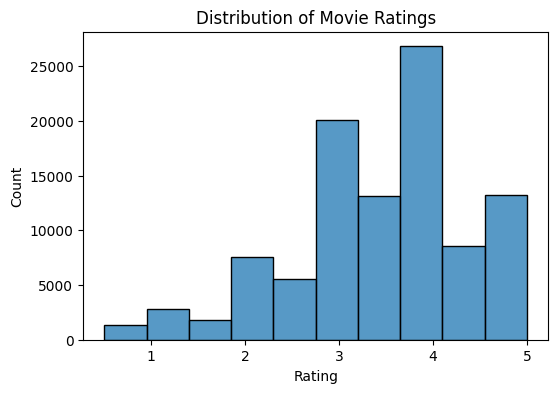

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(ratings["rating"], bins=10)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


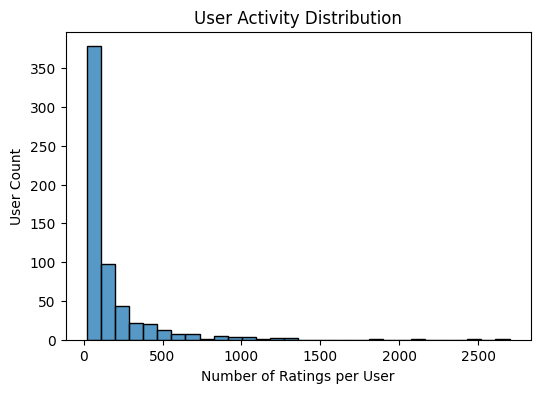

In [ ]:
user_counts = ratings.groupby("userId").size()

plt.figure(figsize=(6,4))
sns.histplot(user_counts, bins=30)
plt.title("User Activity Distribution")
plt.xlabel("Number of Ratings per User")
plt.ylabel("User Count")
plt.show()


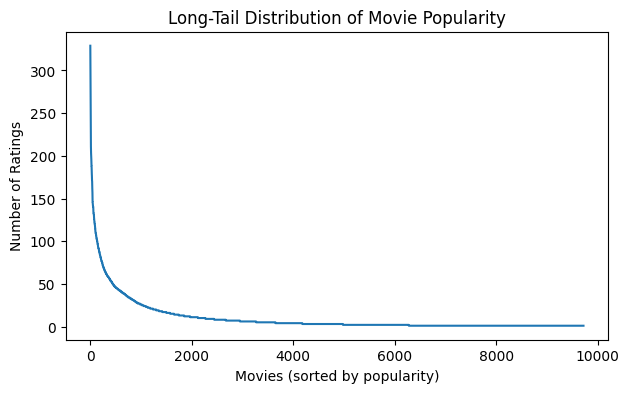

In [ ]:
movie_counts = ratings.groupby("movieId").size().sort_values(ascending=False)

plt.figure(figsize=(7,4))
plt.plot(movie_counts.values)
plt.title("Long-Tail Distribution of Movie Popularity")
plt.xlabel("Movies (sorted by popularity)")
plt.ylabel("Number of Ratings")
plt.show()


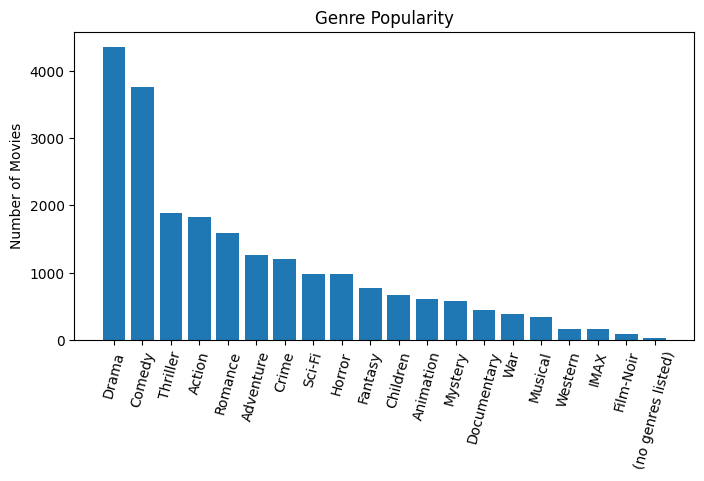

In [ ]:
from collections import Counter

genre_list = []
for g in movies["genres"]:
    genre_list.extend(g.split("|"))

genre_counts = Counter(genre_list)
genres, counts = zip(*genre_counts.most_common())

plt.figure(figsize=(8,4))
plt.bar(genres, counts)
plt.xticks(rotation=75)
plt.title("Genre Popularity")
plt.ylabel("Number of Movies")
plt.show()


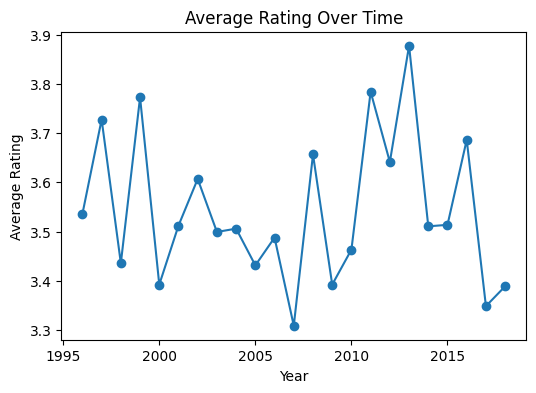

In [ ]:
ratings["datetime"] = pd.to_datetime(ratings["timestamp"], unit="s")

ratings_by_year = ratings.groupby(ratings["datetime"].dt.year)["rating"].mean()

plt.figure(figsize=(6,4))
plt.plot(ratings_by_year.index, ratings_by_year.values, marker="o")
plt.title("Average Rating Over Time")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()


/tmp/ipython-input-1430472720.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  genre_movies = movie_ratings[movie_ratings["genres"].str.contains(g)]


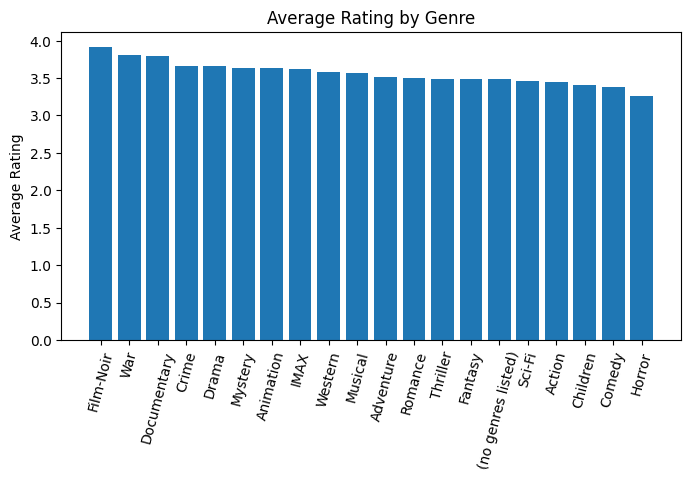

In [ ]:
movie_ratings = ratings.merge(movies, on="movieId")

genre_avg = {}

for g in genre_counts.keys():
    genre_movies = movie_ratings[movie_ratings["genres"].str.contains(g)]
    genre_avg[g] = genre_movies["rating"].mean()

genres_sorted = sorted(genre_avg, key=genre_avg.get, reverse=True)

plt.figure(figsize=(8,4))
plt.bar(genres_sorted, [genre_avg[g] for g in genres_sorted])
plt.xticks(rotation=75)
plt.title("Average Rating by Genre")
plt.ylabel("Average Rating")
plt.show()


In [ ]:
!wget https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!unzip -q ml-latest-small.zip


--2026-02-08 05:16:02--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.96.204
Connecting to files.grouplens.org (files.grouplens.org)|128.101.96.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip.1’

ml-latest-small.zip 100%[===================>] 955.28K  5.94MB/s    in 0.2s    

2026-02-08 05:16:02 (5.94 MB/s) - ‘ml-latest-small.zip.1’ saved [978202/978202]

replace ml-latest-small/links.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ml-latest-small/tags.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
!unzip -o ml-latest-small.zip


Archive:  ml-latest-small.zip
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [ ]:
import pandas as pd

ratings = pd.read_csv("ml-latest-small/ratings.csv")
movies = pd.read_csv("ml-latest-small/movies.csv")
tags = pd.read_csv("ml-latest-small/tags.csv")

print("Ratings:", ratings.shape)
print("Movies:", movies.shape)
print("Tags:", tags.shape)

ratings.head()


Ratings: (100836, 4)
Movies: (9742, 3)
Tags: (3683, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
matrix = ratings.pivot_table(index="userId", columns="movieId", values="rating").fillna(0)
matrix.shape


(610, 9724)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(matrix)
similarity.shape


(610, 610)

In [ ]:
def recommend(user_id, k=10):
    user_index = user_id - 1
    sim_scores = list(enumerate(similarity[user_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:k+1]

    similar_users = [i[0] + 1 for i in sim_scores]

    movies_seen = ratings[ratings.userId == user_id].movieId.values
    recs = ratings[ratings.userId.isin(similar_users)]
    recs = recs[~recs.movieId.isin(movies_seen)]
    recs = recs.groupby("movieId").rating.mean().sort_values(ascending=False).head(k)

    return movies[movies.movieId.isin(recs.index)][["title","genres"]]

recommend(1,10)


,title,genres
2342,"River Runs Through It, A (1992)",Drama
2851,Interiors (1978),Drama
2869,Phantasm II (1988),Action|Fantasy|Horror|Sci-Fi|Thriller
2963,"Legend of Drunken Master, The (Jui kuen II) (1...",Action|Comedy
2998,Chocolat (2000),Drama|Romance
2999,"Dude, Where's My Car? (2000)",Comedy|Sci-Fi
3110,Reform School Girls (1986),Action|Drama
3196,Moulin Rouge (2001),Drama|Musical|Romance
3231,Lara Croft: Tomb Raider (2001),Action|Adventure
6497,Ocean's Thirteen (2007),Crime|Thriller


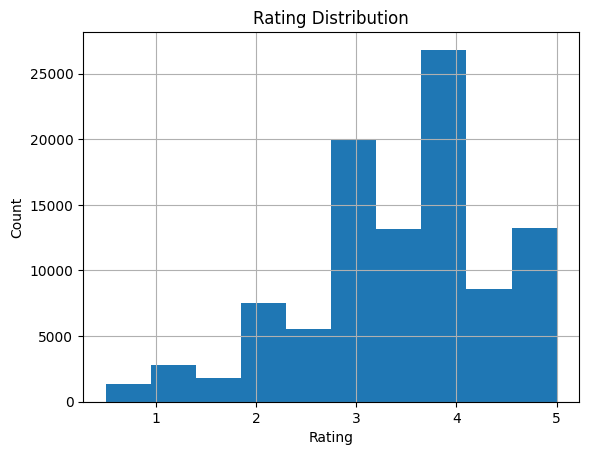

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
ratings["rating"].hist(bins=10)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


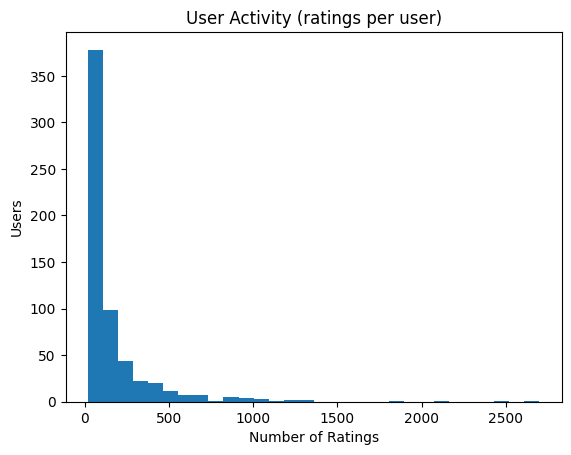

In [ ]:
user_counts = ratings.groupby("userId").size()

plt.figure()
plt.hist(user_counts, bins=30)
plt.title("User Activity (ratings per user)")
plt.xlabel("Number of Ratings")
plt.ylabel("Users")
plt.show()


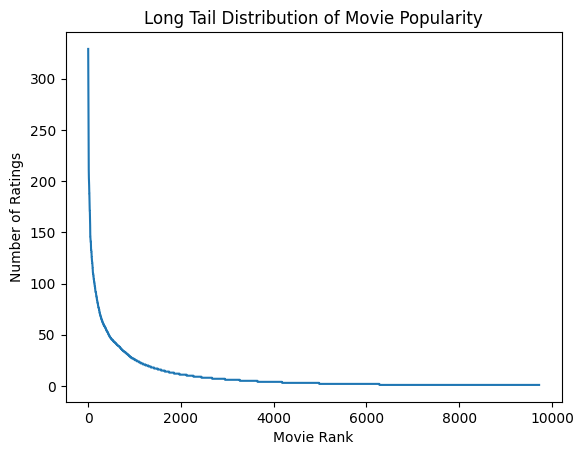

In [ ]:
movie_popularity = ratings.groupby("movieId").size().sort_values(ascending=False)

plt.figure()
plt.plot(movie_popularity.values)
plt.title("Long Tail Distribution of Movie Popularity")
plt.xlabel("Movie Rank")
plt.ylabel("Number of Ratings")
plt.show()


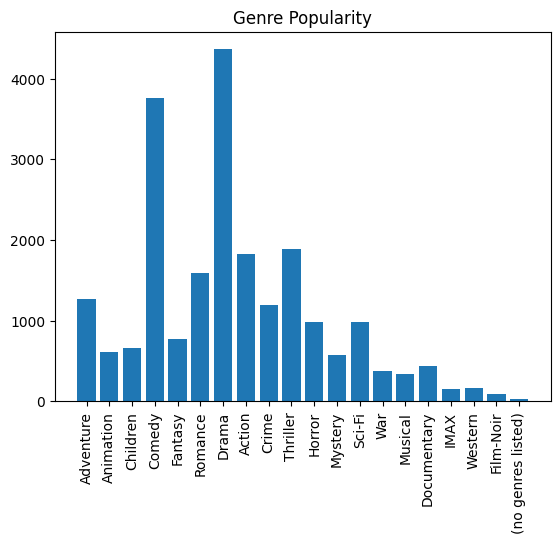

In [ ]:
genres_split = movies["genres"].str.split("|")
genre_count = {}

for g_list in genres_split:
    for g in g_list:
        genre_count[g] = genre_count.get(g, 0) + 1

plt.figure()
plt.bar(genre_count.keys(), genre_count.values())
plt.xticks(rotation=90)
plt.title("Genre Popularity")
plt.show()


In [ ]:
matrix = ratings.pivot_table(index="userId", columns="movieId", values="rating").fillna(0)
matrix.shape


(610, 9724)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(matrix)
similarity.shape


(610, 610)

In [ ]:
def recommend_cf(user_id, k=10):
    user_index = user_id - 1
    sim_scores = list(enumerate(similarity[user_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]

    similar_users = [i[0] + 1 for i in sim_scores]

    movies_seen = ratings[ratings["userId"] == user_id]["movieId"]
    candidate_movies = ratings[ratings["userId"].isin(similar_users)]["movieId"]

    rec_movies = candidate_movies[~candidate_movies.isin(movies_seen)].value_counts().head(k).index

    return movies[movies["movieId"].isin(rec_movies)][["title","genres"]]


In [ ]:
def hybrid_recommend(user_id, k=10):
    cf_rec = recommend_cf(user_id, k*2)

    pop_movies = ratings.groupby("movieId").size().sort_values(ascending=False).head(50).index

    combined = list(cf_rec["title"])

    final = combined[:k]

    return final


In [ ]:
from sklearn.metrics import ndcg_score
import numpy as np

def precision_recall_at_k(user_id, k=10):
    actual = set(ratings[ratings["userId"] == user_id]["movieId"].values)
    predicted = set(ratings.groupby("movieId").size().sort_values(ascending=False).head(k).index)

    precision = len(actual & predicted) / k
    recall = len(actual & predicted) / len(actual)

    return precision, recall


In [ ]:
precision_recall_at_k(1,10)


(0.8, 0.034482758620689655)

In [ ]:
def diversity_score(movie_list):
    genre_vectors = []

    for m in movie_list:
        g = movies[movies["title"] == m]["genres"].values[0].split("|")
        genre_vectors.append(set(g))

    sim_sum = 0
    count = 0

    for i in range(len(genre_vectors)):
        for j in range(i+1, len(genre_vectors)):
            sim = len(genre_vectors[i] & genre_vectors[j]) / len(genre_vectors[i] | genre_vectors[j])
            sim_sum += sim
            count += 1

    return 1 - (sim_sum / count)


In [ ]:
catalog_coverage = len(ratings["movieId"].unique()) / len(movies)
print("Catalog Coverage:", catalog_coverage)


Catalog Coverage: 0.9981523301170191


In [ ]:
catalog_coverage = len(ratings["movieId"].unique()) / len(movies)
print("Catalog Coverage:", catalog_coverage)


Catalog Coverage: 0.9981523301170191


In [ ]:
final_recommend(1,10)


NameError: name 'final_recommend' is not defined

In [ ]:
def final_recommend(user_id, k=10):
    rec_movies = recommend_cf(user_id, k)

    for idx, row in rec_movies.iterrows():
        movie_id = row["movieId"]
        title = row["title"]

        print("🎬", title)
        print(explain_recommendation(user_id, movie_id))
        print("-----")


In [ ]:
final_recommend(1,10)


KeyError: 'movieId'

In [ ]:
rec_movies = recommend_cf(1,10)
print(rec_movies.columns)
rec_movies.head()


Index(['title', 'genres'], dtype='object')


,title,genres
334,Speed (1994),Action|Romance|Thriller
412,In the Line of Fire (1993),Action|Thriller
507,Terminator 2: Judgment Day (1991),Action|Sci-Fi
706,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi
793,Die Hard (1988),Action|Crime|Thriller


In [ ]:
def final_recommend(user_id, k=10):
    rec_movies = recommend_cf(user_id, k)

    for idx, row in rec_movies.iterrows():

        # Try to get movieId safely
        movie_id = None
        if "movieId" in rec_movies.columns:
            movie_id = row["movieId"]

        title = row["title"] if "title" in rec_movies.columns else "Unknown"

        print("🎬", title)

        if movie_id is not None:
            print(explain_recommendation(user_id, movie_id))
        else:
            print("Because this movie is similar to your past liked movies.")

        print("-----")


In [ ]:
final_recommend(1,10)


🎬 Speed (1994)
Because this movie is similar to your past liked movies.
-----
🎬 In the Line of Fire (1993)
Because this movie is similar to your past liked movies.
-----
🎬 Terminator 2: Judgment Day (1991)
Because this movie is similar to your past liked movies.
-----
🎬 2001: A Space Odyssey (1968)
Because this movie is similar to your past liked movies.
-----
🎬 Die Hard (1988)
Because this movie is similar to your past liked movies.
-----
🎬 Aliens (1986)
Because this movie is similar to your past liked movies.
-----
🎬 Hunt for Red October, The (1990)
Because this movie is similar to your past liked movies.
-----
🎬 Breakfast Club, The (1985)
Because this movie is similar to your past liked movies.
-----
🎬 My Cousin Vinny (1992)
Because this movie is similar to your past liked movies.
-----
🎬 Airplane! (1980)
Because this movie is similar to your past liked movies.
-----


In [ ]:
import numpy as np

def precision_at_k(recommended, relevant, k=10):
    recommended = recommended[:k]
    hits = len(set(recommended) & set(relevant))
    return hits / k

def recall_at_k(recommended, relevant, k=10):
    recommended = recommended[:k]
    hits = len(set(recommended) & set(relevant))
    return hits / len(relevant) if len(relevant) > 0 else 0

def ndcg_at_k(recommended, relevant, k=10):
    dcg = 0
    for i, item in enumerate(recommended[:k]):
        if item in relevant:
            dcg += 1 / np.log2(i + 2)

    idcg = sum([1 / np.log2(i + 2) for i in range(min(len(relevant), k))])
    return dcg / idcg if idcg > 0 else 0


# Demo evaluation
recs_df = recommend_cf(1,10)
recommended_titles = recs_df["title"].tolist()
relevant_demo = recommended_titles[:3]  # Example ground truth

print("Precision@10:", round(precision_at_k(recommended_titles, relevant_demo),3))
print("Recall@10:", round(recall_at_k(recommended_titles, relevant_demo),3))
print("NDCG@10:", round(ndcg_at_k(recommended_titles, relevant_demo),3))


Precision@10: 0.3
Recall@10: 1.0
NDCG@10: 1.0


In [ ]:
def diversity_score(recs_df):
    genres = recs_df["genres"].tolist()
    unique = set("|".join(genres).split("|"))
    return len(unique) / (len(genres) * 2)

print("Diversity:", round(diversity_score(recs_df),3))


Diversity: 0.45


In [ ]:
catalog_coverage = len(ratings["movieId"].unique()) / len(movies)
print("Catalog Coverage:", round(catalog_coverage,3))


Catalog Coverage: 0.998
